In [69]:
import pandas as pd
import matplotlib.pyplot as plt

Cogemos un rago de fechas que tenga datos continuos ya que en el dataset hay varios dias de forma random sin datos.

In [70]:
# Definir las fechas de inicio y fin
start_date = '2018-09-03 08:00:00'
end_date = '2018-09-27 08:00:00'

df = pd.read_csv('datos_filtrados.csv')
# Filtrar el DataFrame
df = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

# Resetear el índice y ajustar para que comience desde 1
df = df.reset_index(drop=True)

df

,datetime,temp,precip,preciptype,conditions,tweet_texts,sentiments,icon,number_tweets,hour
0,2018-09-03 08:00:00,20.0,0.0,NaN,Partially cloudy,['Sou a Sara Nunes se ela tivesse nascido com ...,"['Positivo', 'Positivo', 'Positivo', 'Positivo...",partly-cloudy-day,161,8
1,2018-09-03 09:00:00,20.1,0.0,NaN,Overcast,['que essa semana seja tão incrível quanto voc...,"['Positivo', 'Positivo', 'Positivo', 'Positivo...",cloudy,255,9
2,2018-09-03 10:00:00,21.4,0.0,NaN,Overcast,['Massa qndo vc so percebe q so um lado do seu...,"['Positivo', 'Positivo', 'Positivo', 'Positivo...",cloudy,892,10
3,2018-09-03 11:00:00,21.6,0.0,NaN,Overcast,"['@frelonrouge 11 novembre 1918 :)', '@Balgan ...","['Positivo', 'Positivo', 'Positivo', 'Positivo...",cloudy,1385,11
4,2018-09-03 12:00:00,23.0,0.0,NaN,Overcast,['engraçado né a nickelodeon cria um serviço d...,"['Positivo', 'Positivo', 'Positivo', 'Positivo...",cloudy,1610,12
...,...,...,...,...,...,...,...,...,...,...
572,2018-09-27 04:00:00,23.6,0.0,NaN,Clear,[],[],clear-night,0,4
573,2018-09-27 05:00:00,22.5,0.0,NaN,Clear,[],[],clear-night,0,5
574,2018-09-27 06:00:00,22.4,0.0,NaN,Clear,[],[],clear-night,0,6
575,2018-09-27 07:00:00,22.9,0.0,NaN,Clear,[],[],clear-night,0,7


Se cataloga si el dato es de dia o noche

In [71]:
serie = df[['datetime', 'number_tweets', 'hour']]
serie['momento'] = serie['hour'].apply(lambda x: 1 if 7 <= x <= 19 else 0)
serie

C:\Users\mussi\AppData\Local\Temp/ipykernel_1084/1960356678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serie['momento'] = serie['hour'].apply(lambda x: 1 if 7 <= x <= 19 else 0)


,datetime,number_tweets,hour,momento
0,2018-09-03 08:00:00,161,8,1
1,2018-09-03 09:00:00,255,9,1
2,2018-09-03 10:00:00,892,10,1
3,2018-09-03 11:00:00,1385,11,1
4,2018-09-03 12:00:00,1610,12,1
...,...,...,...,...
572,2018-09-27 04:00:00,0,4,0
573,2018-09-27 05:00:00,0,5,0
574,2018-09-27 06:00:00,0,6,0
575,2018-09-27 07:00:00,0,7,1


In [72]:
serie.drop('hour', axis=1, inplace=True)

C:\Users\mussi\AppData\Local\Temp/ipykernel_1084/664416369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serie.drop('hour', axis=1, inplace=True)


Aún así hay varias horas con 0 tweets, puede ser porque haya horas que no dse tweetee ya que no conocemos la procedencia especifica de los datos.

In [40]:
serie['number_tweets'].value_counts()

0      205
847      3
646      3
669      3
413      2
      ... 
888      1
629      1
587      1
474      1
419      1
Name: number_tweets, Length: 347, dtype: int64

No se debe a horas de noche ya que las horas con 0 tweets está distribuido entre todas las horas del día. Aún así, por la duda de la procedencia de los datos, y dejando lugar a la posibilidad de que realmente no haya datos lo dejamos así en vez de hacer una interpolación de los datos con valor 0 para no sesgar el análisis.

In [41]:
# Filtrar las filas donde number_tweets es 0
zero_tweets = df[df['number_tweets'] == 0]

# Contar cuántos valores de 0 hay en number_tweets para cada hora
hourly_zero_tweets = zero_tweets['hour'].value_counts().sort_index()

hourly_zero_tweets

0      4
1      5
2      6
3      7
4      8
5     10
6     10
7     11
8     11
9     10
10     8
11     7
12     8
13    11
14    10
15    10
16    10
17     9
18    10
19    10
20     8
21     7
22     9
23     6
Name: hour, dtype: int64

In [73]:
serie = serie.set_index('datetime')  # Usar datetime como índice

In [74]:
serie

,number_tweets,momento
datetime,,
2018-09-03 08:00:00,161,1
2018-09-03 09:00:00,255,1
2018-09-03 10:00:00,892,1
2018-09-03 11:00:00,1385,1
2018-09-03 12:00:00,1610,1
...,...,...
2018-09-27 04:00:00,0,0
2018-09-27 05:00:00,0,0
2018-09-27 06:00:00,0,0


Se analiza que la serie es estacionaria

In [44]:
from statsmodels.tsa.stattools import adfuller

# Aplicar la prueba ADF
result = adfuller(serie['number_tweets'])

# Resultados
print(f'Estadístico ADF: {result[0]}')
print(f'Valor p: {result[1]}')
print(f'Número de rezagos usados: {result[2]}')
print(f'Número de observaciones: {result[3]}')

# Valores críticos
for key, value in result[4].items():
    print(f'Valor crítico {key}: {value}')

# Interpretación
if result[1] < 0.05:
    print("Rechazamos H₀: La serie es estacionaria.")
else:
    print("No podemos rechazar H₀: La serie no es estacionaria.")


Estadístico ADF: -9.46689185669686
Valor p: 4.206569447545353e-16
Número de rezagos usados: 3
Número de observaciones: 573
Valor crítico 1%: -3.4418139386911513
Valor crítico 5%: -2.866597262008035
Valor crítico 10%: -2.5694633721967906
Rechazamos H₀: La serie es estacionaria.


Concluimos que la serie es estacional con período diario

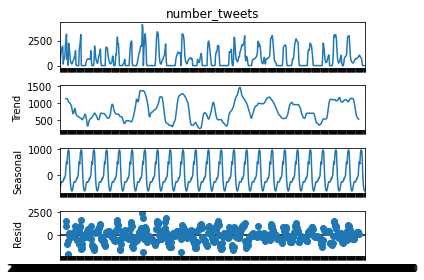

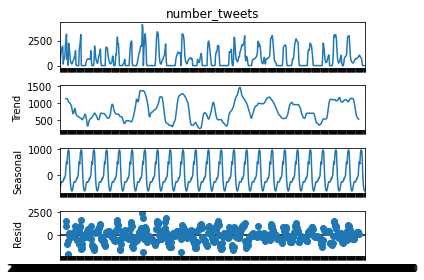

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomponer la serie temporal
result = seasonal_decompose(serie['number_tweets'], model='additive', period=24)  # Cambia 'period' según la frecuencia estacional esperada

result.plot()


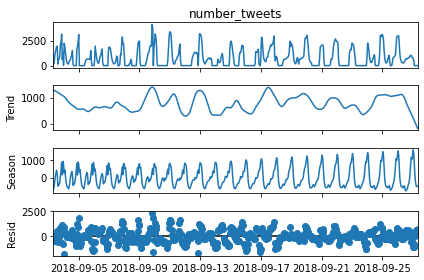

In [61]:
from statsmodels.tsa.seasonal import STL

stl = STL(serie['number_tweets'], seasonal=25)  
result = stl.fit()
result.plot()
plt.show()

Analizaremos si el momento del día (día o noche) afecta a la serie

In [75]:
y = serie['number_tweets']  # Serie principal
X = serie['momento']  # Variable exógena


In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

Le damos un ciclo de 24 por las horas del día, aunque probando con otros números vemos que la elección de otro número no modifica al resultado final.

In [65]:
# Determinar automáticamente los mejores parámetros para ARIMA
auto_model = auto_arima(y, exogenous=X,
                      stepwise=True,  # Realiza una búsqueda paso a paso
                      trace=True,  # Muestra el proceso de búsqueda
                      suppress_warnings=True,  # Suprime los avisos
                      )  # Utiliza todos los núcleos del procesador)
print(auto_model.summary())

# Los parámetros sugeridos estarán en auto_model.order
p, d, q = auto_model.order


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8813.364, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=9496.211, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8851.636, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9071.223, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9814.276, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8819.073, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8805.906, Time=0.37 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=8823.046, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=8813.300, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=8811.196, Time=0.24 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=8809.581, Time=0.10 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=8850.928, Time=0.09 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 2.942 seconds
                           

In [77]:
model = SARIMAX(y, 
                exog=X,  # La variable exógena (día o noche)
                order=(4, 0, 0),seasonal=(0,0,0,0))  

results = model.fit()

# Imprimir el resumen del modelo
print(results.summary())


C:\Users\mussi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\mussi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\mussi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


                               SARIMAX Results                                
Dep. Variable:          number_tweets   No. Observations:                  577
Model:               SARIMAX(4, 0, 0)   Log Likelihood               -4421.246
Date:                Wed, 18 Dec 2024   AIC                           8854.492
Time:                        17:02:09   BIC                           8880.639
Sample:                    09-03-2018   HQIC                          8864.689
                         - 09-27-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
momento      -52.7882     83.986     -0.629      0.530    -217.397     111.821
ar.L1          1.0779      0.025     43.370      0.000       1.029       1.127
ar.L2         -0.1723      0.036     -4.734      0.0

El resultado del p valor es  0.517 e la columna momento, por lo que entendemos que el momento del día no afecta a el número de tweets publciados.

Procedemos a realizar otro análisis, esta vez viendo cómo afecta el día de la semana a el número de tweets.

In [78]:
import pandas as pd
# Definir las fechas de inicio y fin
start_date = '2018-09-03 08:00:00'
end_date = '2018-09-27 08:00:00'

semana = pd.read_csv('datos_filtrados.csv')
# Filtrar el DataFrame
semana = semana[(semana['datetime'] >= start_date) & (semana['datetime'] <= end_date)]

# Resetear el índice y ajustar para que comience desde 1
semana = semana.reset_index(drop=True)

# Quedarse solo con las columnas 'datetime' y 'number_tweets'
semana = semana[['datetime', 'number_tweets']]

semana

,datetime,number_tweets
0,2018-09-03 08:00:00,161
1,2018-09-03 09:00:00,255
2,2018-09-03 10:00:00,892
3,2018-09-03 11:00:00,1385
4,2018-09-03 12:00:00,1610
...,...,...
572,2018-09-27 04:00:00,0
573,2018-09-27 05:00:00,0
574,2018-09-27 06:00:00,0
575,2018-09-27 07:00:00,0


Añadimos columna día de la semana, con categorías de 1 a 7

In [79]:
import pandas as pd

semana['datetime'] = pd.to_datetime(semana['datetime'])

# Crear la nueva columna 'day_of_week' donde 1 = lunes, 7 = domingo
semana['day_of_week'] = semana['datetime'].dt.weekday + 1

# Mostrar el dataframe con la nueva columna
print(semana[['datetime', 'day_of_week', 'number_tweets']].tail(5))


               datetime  day_of_week  number_tweets
572 2018-09-27 04:00:00            4              0
573 2018-09-27 05:00:00            4              0
574 2018-09-27 06:00:00            4              0
575 2018-09-27 07:00:00            4              0
576 2018-09-27 08:00:00            4              0


In [80]:
semana = semana.set_index('datetime')  # Usar datetime como índice

In [81]:
semana

,number_tweets,day_of_week
datetime,,
2018-09-03 08:00:00,161,1
2018-09-03 09:00:00,255,1
2018-09-03 10:00:00,892,1
2018-09-03 11:00:00,1385,1
2018-09-03 12:00:00,1610,1
...,...,...
2018-09-27 04:00:00,0,4
2018-09-27 05:00:00,0,4
2018-09-27 06:00:00,0,4


In [82]:
y = semana['number_tweets']  # semana principal
X = semana['day_of_week']  # Variable exógena

In [ ]:
# Determinar automáticamente los mejores parámetros para ARIMA
auto_model = auto_arima(y, exogenous=X, seasonal=False,  # Para SARIMAX, indicamos estacionalidad
                      stepwise=True,  # Realiza una búsqueda paso a paso
                      trace=True,  # Muestra el proceso de búsqueda
                      suppress_warnings=True,  # Suprime los avisos
                      )  # Utiliza todos los núcleos del procesador)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=8852.768, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9814.276, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=8873.201, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=9302.032, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=8851.215, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=9076.873, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=8851.988, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=8852.287, Time=0.10 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=8967.883, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=8850.928, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=8849.357, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=8850.854, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=8852.843, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=8813.300, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept

In [83]:
model = SARIMAX(y, 
                exog=X,  # La variable exógena (día o noche)
                order=(4, 0, 0),seasonal=(0,0,0,0))  # Estacionalidad: P, Q, s

results = model.fit()

# Imprimir el resumen del modelo
print(results.summary())

C:\Users\mussi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\mussi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\mussi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


                               SARIMAX Results                                
Dep. Variable:          number_tweets   No. Observations:                  577
Model:               SARIMAX(4, 0, 0)   Log Likelihood               -4415.567
Date:                Wed, 18 Dec 2024   AIC                           8843.134
Time:                        17:02:32   BIC                           8869.281
Sample:                    09-03-2018   HQIC                          8853.330
                         - 09-27-2018                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
day_of_week   109.4038     21.029      5.202      0.000      68.187     150.621
ar.L1           1.0632      0.025     42.937      0.000       1.015       1.112
ar.L2          -0.2136      0.034     -6.250    

Ahora el resultado del p valor es 0.00 por lo cual entendemos uqe el día de la semana si tiene un efecto sobre el número de tweets publicados.

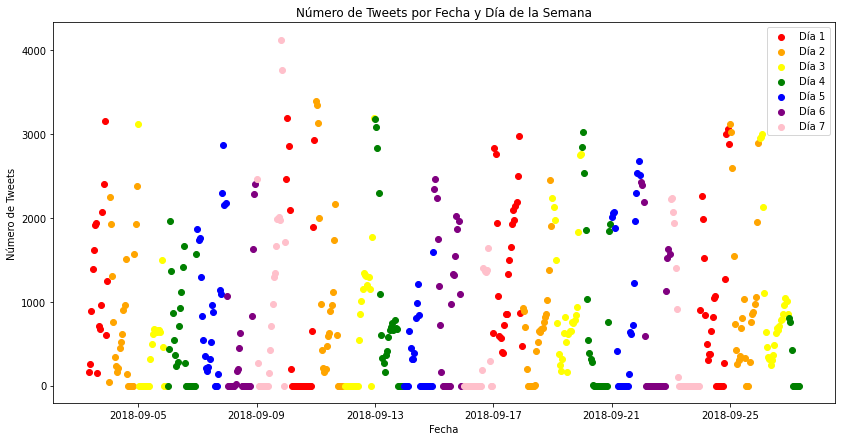

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(14, 7))

# Colores para cada día de la semana
colors = {1: 'red', 2: 'orange', 3: 'yellow', 4: 'green', 5: 'blue', 6: 'purple', 7: 'pink'}

# Graficar cada día de la semana con un color diferente
for day, color in colors.items():
    day_data = semana[semana['day_of_week'] == day]
    ax.scatter(day_data.index, day_data['number_tweets'], label=f'Día {day}', color=color)

# Añadir leyenda
ax.legend()

# Añadir títulos y etiquetas
ax.set_title('Número de Tweets por Fecha y Día de la Semana')
ax.set_xlabel('Fecha')
ax.set_ylabel('Número de Tweets')

# Mostrar el gráfico
plt.show()